Saving Mall_Customers.csv to Mall_Customers.csv


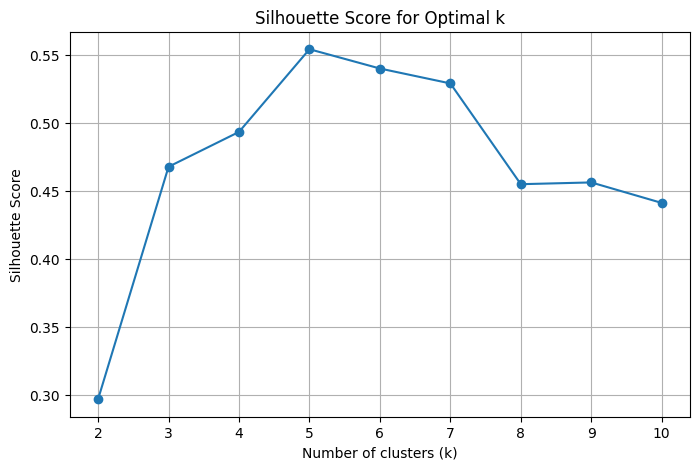

Optimal number of clusters: 5
Silhouette Score for optimal k: 0.553931997444648
Final Silhouette Score: 0.553931997444648


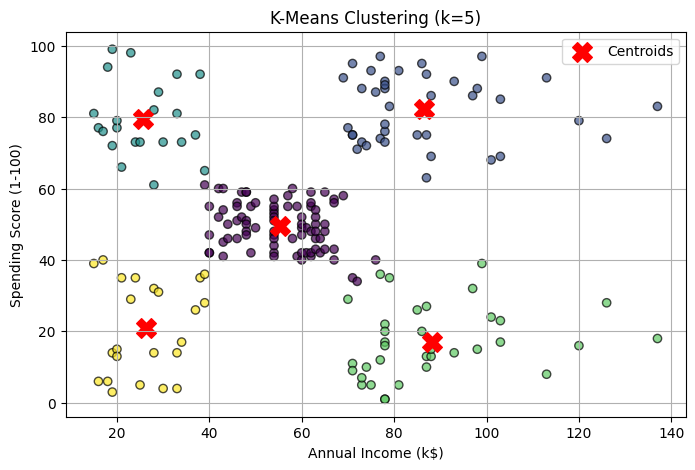

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab import files  # For file upload in Google Colab

# Upload file
uploaded = files.upload()

# Load the dataset
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Select relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Function to determine the optimal number of clusters using silhouette score
def optimal_k_using_silhouette(X, max_k=10):
    best_k = 2
    best_score = -1
    scores = []

    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        scores.append(score)

        if score > best_score:
            best_k = k
            best_score = score

    # Plot silhouette scores
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_k + 1), scores, marker='o', linestyle='-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for Optimal k')
    plt.grid(True)
    plt.show()

    return best_k, best_score

# Find optimal k
best_k, best_score = optimal_k_using_silhouette(X)
print(f'Optimal number of clusters: {best_k}')
print(f'Silhouette Score for optimal k: {best_score}')

# Perform K-Means clustering with the best k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Compute silhouette score for the final clustering
final_silhouette = silhouette_score(X, labels)
print(f'Final Silhouette Score: {final_silhouette}')

# Plot clustered data
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title(f'K-Means Clustering (k={best_k})')
plt.legend()
plt.grid(True)
plt.show()
